In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/all-data.csv',encoding = 'latin-1')

In [ ]:
df.head()


neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...

In [ ]:
data=["sentiment","text"]
df.columns=data

In [ ]:
df.head()

sentiment                                               text
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...

In [ ]:
df.tail()

sentiment                                               text
4840  negative  LONDON MarketWatch -- Share prices ended lower...
4841   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4843  negative  Net sales of the Paper segment decreased to EU...
4844  negative  Sales in Finland decreased by 10.5 % in Januar...

In [ ]:
df[df['sentiment']=='positive'].head()

sentiment                                               text
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5  positive  For the last quarter of 2010 , Componenta 's n...
6  positive  In the third quarter of 2010 , net sales incre...

In [ ]:
df[df['sentiment']=='neutral'].head()

sentiment                                               text
0    neutral  Technopolis plans to develop in stages an area...
57   neutral  At the request of Finnish media company Alma M...
58   neutral  In Sweden , Gallerix accumulated SEK denominat...
59   neutral  The company supports its global customers in d...
60   neutral  When this investment is in place , Atria plans...

In [ ]:
df[df['sentiment']=='negative'].head()

sentiment                                               text
1    negative  The international electronic industry company ...
414  negative  A tinyurl link takes users to a scamming site ...
420  negative  Compared with the FTSE 100 index , which rose ...
422  negative  Compared with the FTSE 100 index , which rose ...
499  negative  One of the challenges in the oil production in...

In [ ]:
df.sample(10)

sentiment                                               text
1834  positive  After the renovation the biggest moulding line...
4300   neutral      A 2001 agreement expired earlier this month .
475    neutral  ALEXANDRIA , Va. , May 16 -- Kenneth Bower of ...
4553  negative  Finnair believes the strike will cause it dail...
2591   neutral  The capital structure of Solidium may be compl...
4476   neutral  INTERNET BUSINESS NEWS - -_ 1995-2006 M2 COMMU...
4049  negative  The company 's annual loss amounted to EEK 18m...
4790  negative  In the building and home improvement trade , n...
3760   neutral  The acquisition is part of Ramirent 's Central...
3175   neutral  The changes will take effect on 1 January 2010...

In [ ]:
df['sentiment'].value_counts()

sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

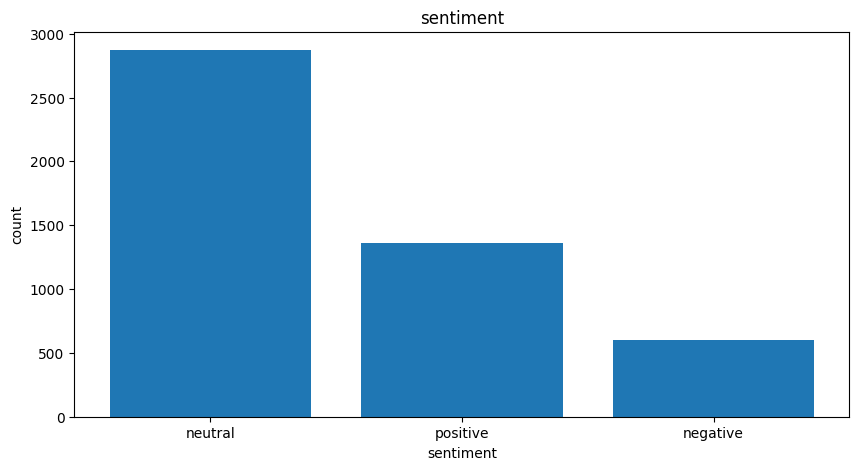

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df['sentiment'].value_counts().index,df['sentiment'].value_counts().values)
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('sentiment')
plt.show()

This diagram showcases how data is distributed over sentiment

<Axes: ylabel='count'>

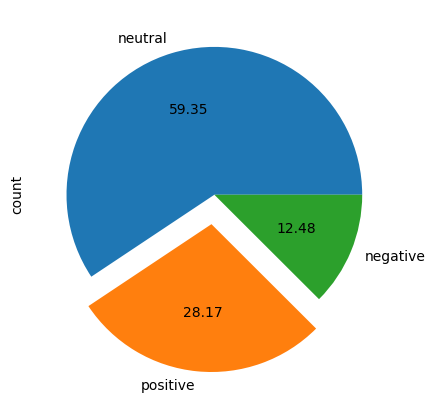

In [ ]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%.2f',explode=(0,0.2,0))

**Data Preprocessing**

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

**import Stop words**

In [ ]:
# Load NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df['cleaned_text']

0       technopolis plans develop stages area less 100...
1       international electronic industry company elco...
2       new production plant company would increase ca...
3       according company updated strategy years 20092...
4       financing aspocomp growth aspocomp aggressivel...
                              ...                        
4840    london marketwatch share prices ended lower lo...
4841    rinkuskiai beer sales fell 65 per cent 416 mil...
4842    operating profit fell eur 354 mn eur 688 mn 20...
4843    net sales paper segment decreased eur 2216 mn ...
4844    sales finland decreased 105 january sales outs...
Name: cleaned_text, Length: 4839, dtype: object

**tokenization**

In [ ]:
def tokenize(text):
    return text.split()  # Split by space to get individual words

df['cleaned_text'] = df['cleaned_text'].apply(tokenize)

In [ ]:
df.head(2)

sentiment                                               text  \
0   neutral  Technopolis plans to develop in stages an area...   
1  negative  The international electronic industry company ...   

                                        cleaned_text  
0  [technopolis, plans, develop, stages, area, le...  
1  [international, electronic, industry, company,...

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

In [ ]:
df.head()

sentiment                                               text  \
0   neutral  Technopolis plans to develop in stages an area...   
1  negative  The international electronic industry company ...   
2  positive  With the new production plant the company woul...   
3  positive  According to the company 's updated strategy f...   
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   

                                        cleaned_text  
0  [technopolis, plans, develop, stages, area, le...  
1  [international, electronic, industry, company,...  
2  [new, production, plant, company, would, incre...  
3  [according, company, updated, strategy, years,...  
4  [financing, aspocomp, growth, aspocomp, aggres...

**Lemmatization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize)

In [ ]:
df.head()

sentiment                                               text  \
0   neutral  Technopolis plans to develop in stages an area...   
1  negative  The international electronic industry company ...   
2  positive  With the new production plant the company woul...   
3  positive  According to the company 's updated strategy f...   
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   

                                        cleaned_text  
0  [technopolis, plan, develop, stage, area, le, ...  
1  [international, electronic, industry, company,...  
2  [new, production, plant, company, would, incre...  
3  [according, company, updated, strategy, year, ...  
4  [financing, aspocomp, growth, aspocomp, aggres...

In [ ]:
# Vectorization
vectorizer = TfidfVectorizer()
# Convert the list of tokens back to strings
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x))
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

In [ ]:
y

0        neutral
1       negative
2       positive
3       positive
4       positive
          ...   
4840    negative
4841     neutral
4842    negative
4843    negative
4844    negative
Name: sentiment, Length: 4839, dtype: object

In [ ]:
df.columns

Index(['sentiment', 'text', 'cleaned_text'], dtype='object')

It shows What are The Columns Available in Dataset

# **Data Visualization**

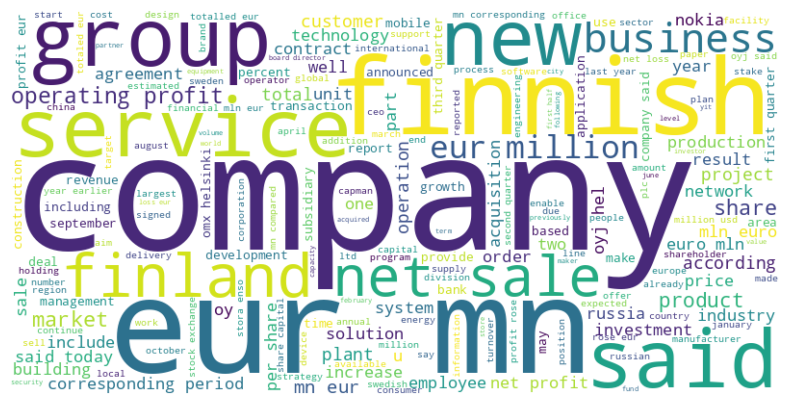

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text
text_combined = ' '.join([' '.join(x) if isinstance(x,list) else x for x in df['cleaned_text']])
#This line iterates through the column, checking if an element is a list. If it is, it joins the elements within the list into a single string.
#If not, it uses the element as is.

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

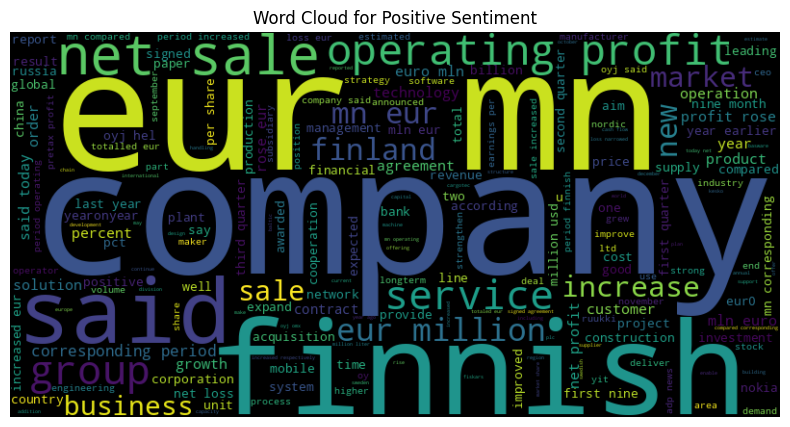

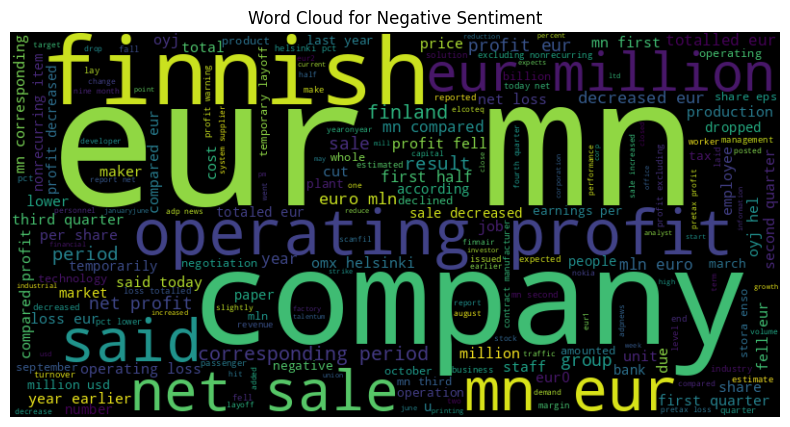

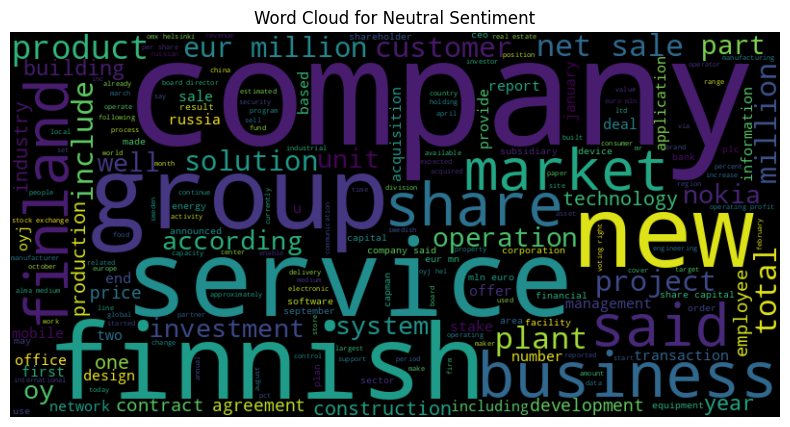

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

# Generate word cloud for negative sentiment
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_text'])
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

# Generate word cloud for neutral sentiment
negative_text = ' '.join(df[df['sentiment'] == 'neutral']['cleaned_text'])
wordcloud_neutral = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()

The code creates a word cloud visualizing the most frequent words from the cleaned text.

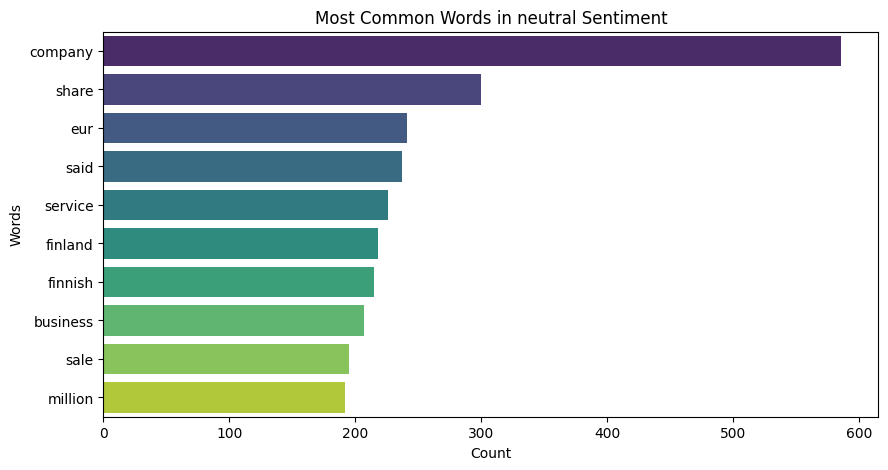

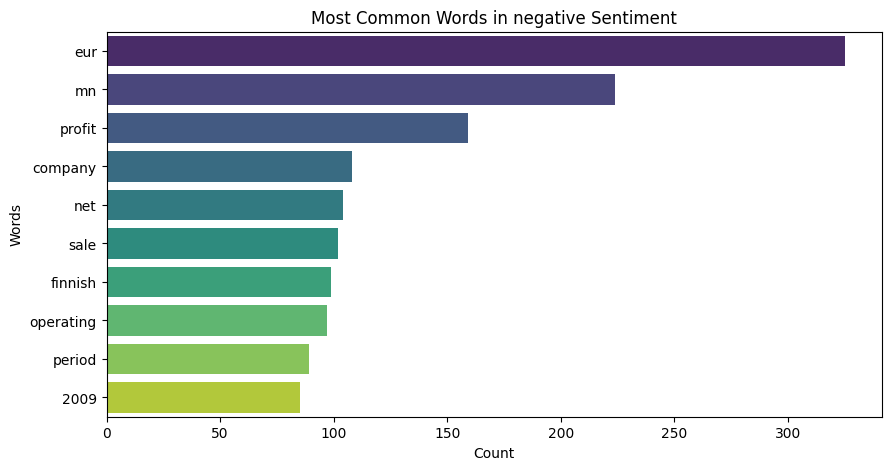

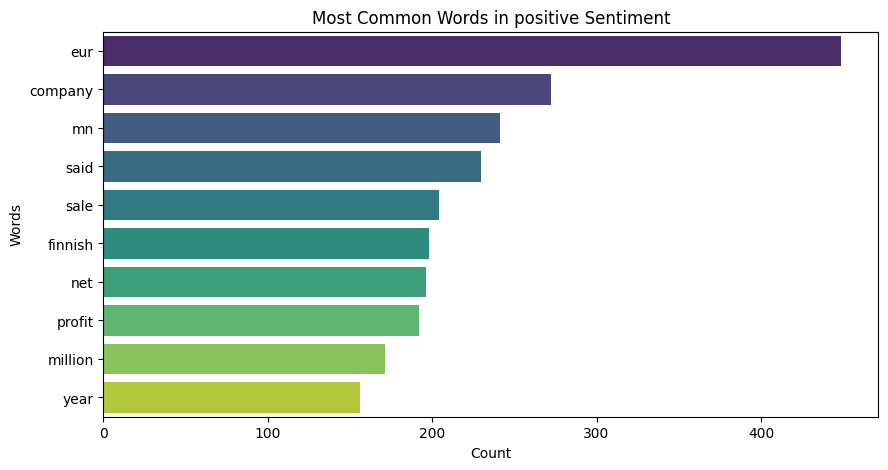

In [ ]:
from collections import Counter

def plot_common_words(df, sentiment):
    words = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    word_counts = Counter(words.split())
    common_words = word_counts.most_common(10)

    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Most Common Words in {sentiment} Sentiment')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

# Plot for each sentiment
for sentiment in df['sentiment'].unique():
    plot_common_words(df, sentiment)


The code visualizes the ten most common words per sentiment.

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud_comparison(dfs, df, sentiment):
    # Generate text for the word cloud from both before (dfs) and after (df) removing stopwords
    sentiment_text_before = ' '.join(dfs[dfs['sentiment'] == sentiment]['cleaned_text'])
    sentiment_text_after = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])

    # Create word clouds
    wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text_before)
    wordcloud_after = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text_after)

    # Plot the word clouds side by side
    plt.figure(figsize=(20,10))

    # Word cloud before stopword removal
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_before, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment (Before Stopwords Removal)')

    # Word cloud after stopword removal
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_after, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment (After Stopwords Removal)')

    plt.show()

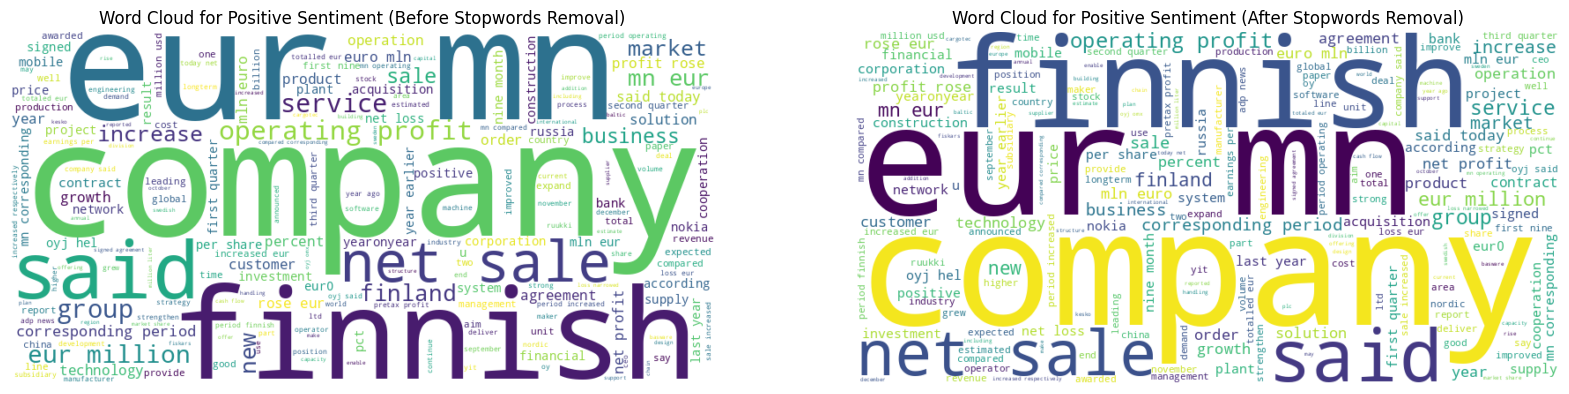

In [ ]:
generate_wordcloud_comparison(df, df, 'positive')

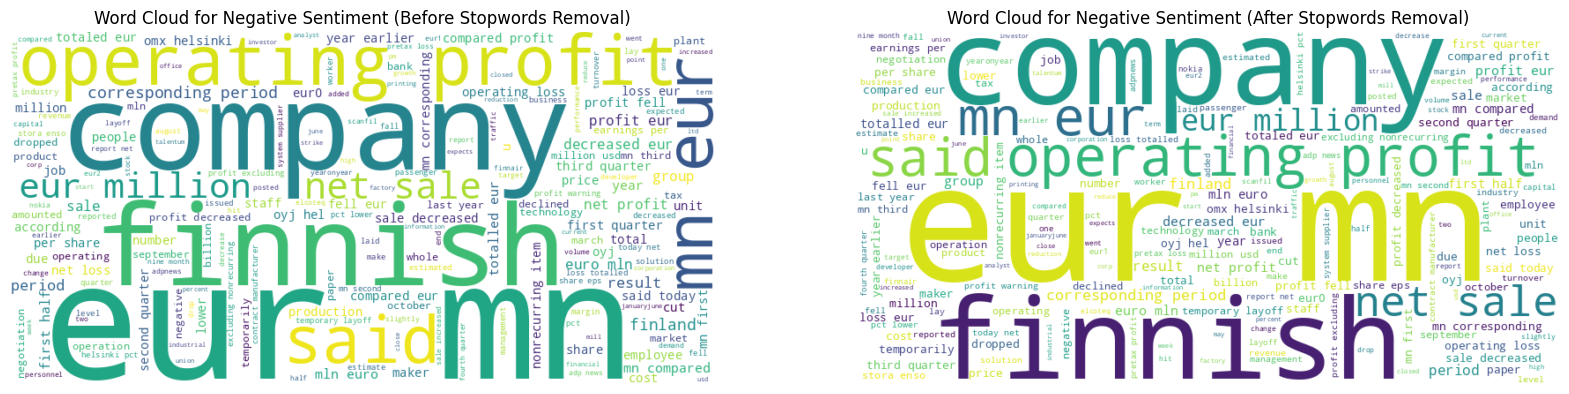

In [ ]:
generate_wordcloud_comparison(df, df, 'negative')

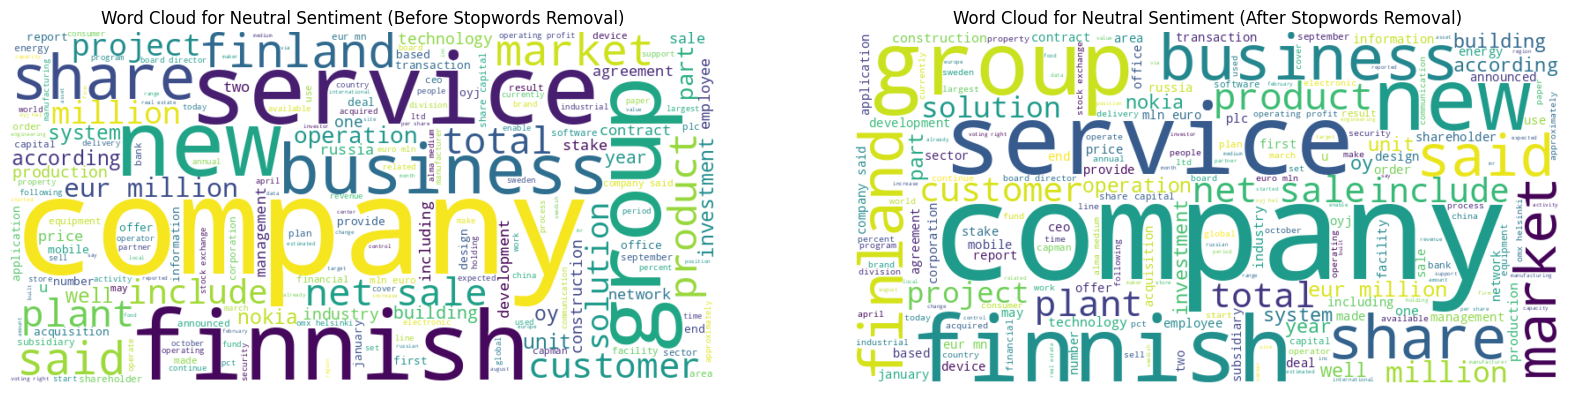

In [ ]:
generate_wordcloud_comparison(df, df, 'neutral')

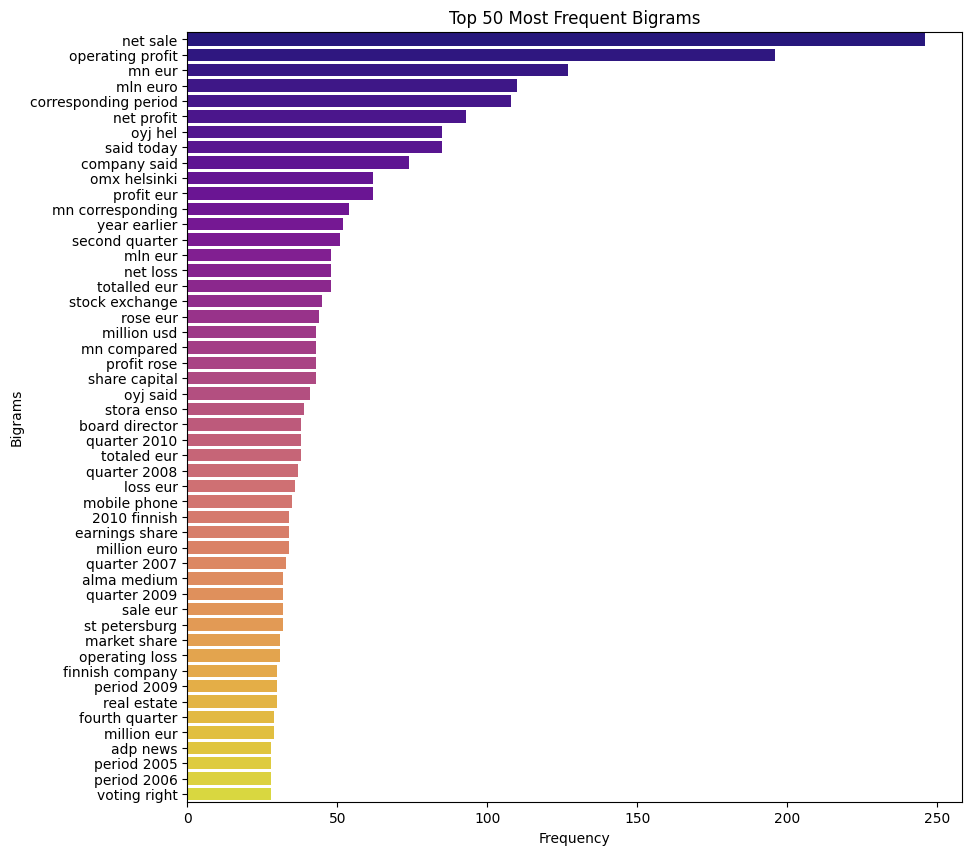

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), num_ngrams=50):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Bigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

corpus = df['cleaned_text'].tolist()
plot_top_ngrams(corpus, ngram_range=(2, 2))  # Bigrams

Bigrams are pairs of words that help capture context in language. They improve predictions, enhance features, and assist in sentiment analysis.

## **Data Pre-Processing**

# TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF scores help identify the importance of words in the dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

00  000  000063  0008  001  002  0025  003  0030  004  ...  zinc  \
0  0.0  0.0     0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0   
1  0.0  0.0     0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0   
2  0.0  0.0     0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0   
3  0.0  0.0     0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0   
4  0.0  0.0     0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0   

   zinclead  zip  zloty  zoltan  zone  zoo  zte   zu   ðl  
0       0.0  0.0    0.0     0.0   0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0    0.0     0.0   0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0    0.0     0.0   0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0    0.0     0.0   0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0    0.0     0.0   0.0  0.0  0.0  0.0  0.0  

[5 rows x 10284 columns]

**A word cloud can visually represent the importance of words based on their TF-IDF scores.**

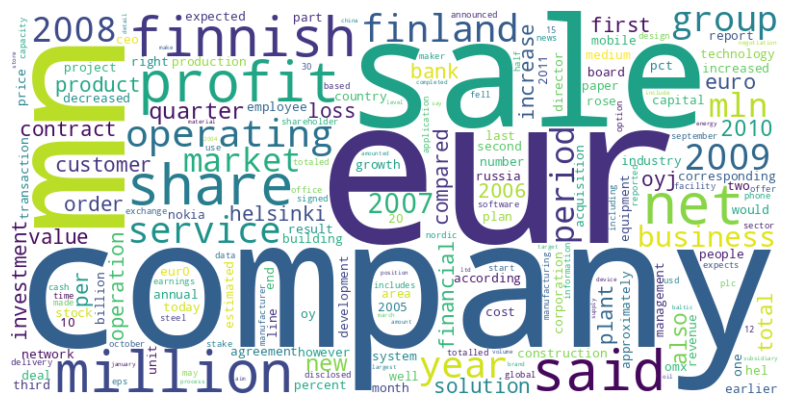

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sum the TF-IDF scores for each term across all documents
tfidf_sum = tfidf_df.sum(axis=0)

# Create a dictionary for the word cloud
word_freq = {word: tfidf_sum[word] for word in tfidf_sum.index}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(df['cleaned_text'])

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.head()

00  000  000063  0008  001  002  0025  003  0030  004  ...  zinc  zinclead  \
0   0    0       0     0    0    0     0    0     0    0  ...     0         0   
1   0    0       0     0    0    0     0    0     0    0  ...     0         0   
2   0    0       0     0    0    0     0    0     0    0  ...     0         0   
3   0    0       0     0    0    0     0    0     0    0  ...     0         0   
4   0    0       0     0    0    0     0    0     0    0  ...     0         0   

   zip  zloty  zoltan  zone  zoo  zte  zu  ðl  
0    0      0       0     0    0    0   0   0  
1    0      0       0     0    0    0   0   0  
2    0      0       0     0    0    0   0   0  
3    0      0       0     0    0    0   0   0  
4    0      0       0     0    0    0   0   0  

[5 rows x 10284 columns]

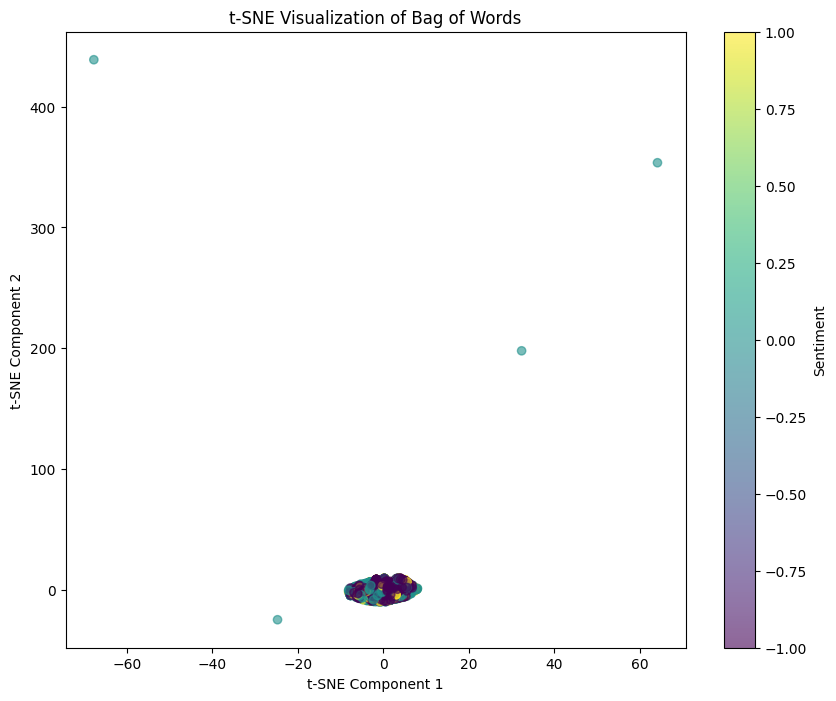

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Step 1: Create the BoW matrix from cleaned_text
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Step 2: Apply t-SNE on the BoW matrix
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Step 3: Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['sentiment'] = df['sentiment']  # Add sentiment column for coloring

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'],
                      c=tsne_df['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0}),
                      cmap='viridis', alpha=0.6)

plt.title('t-SNE Visualization of Bag of Words')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Sentiment')
plt.show()


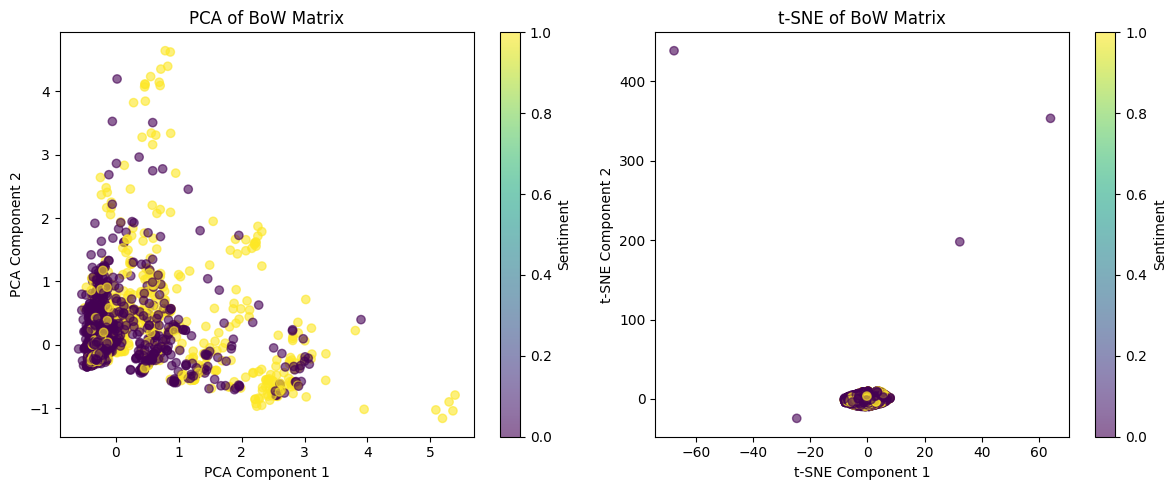

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(bow_df)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(bow_df)

# Step 4: Create DataFrames for PCA and t-SNE results
pca_df = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE1', 't-SNE2'])

# Add sentiment column for coloring in plots
pca_df['sentiment'] = df['sentiment']
tsne_df['sentiment'] = df['sentiment']

# Plotting PCA results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter_pca = plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
                           c=pca_df['sentiment'].map({'positive': 1, 'neutral': 0}),
                           cmap='viridis', alpha=0.6)
plt.title('PCA of BoW Matrix')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter_pca, label='Sentiment')

# Plotting t-SNE results
plt.subplot(1, 2, 2)
scatter_tsne = plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'],
                            c=tsne_df['sentiment'].map({'positive': 1, 'neutral': 0}),
                            cmap='viridis', alpha=0.6)
plt.title('t-SNE of BoW Matrix')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_tsne, label='Sentiment')

plt.tight_layout()
plt.show()

In [ ]:
df.columns


Index(['sentiment', 'text', 'cleaned_text'], dtype='object')

In [ ]:
df.head()

sentiment                                               text  \
0   neutral  Technopolis plans to develop in stages an area...   
1  negative  The international electronic industry company ...   
2  positive  With the new production plant the company woul...   
3  positive  According to the company 's updated strategy f...   
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   

                                        cleaned_text  
0  technopolis plan develop stage area le 100000 ...  
1  international electronic industry company elco...  
2  new production plant company would increase ca...  
3  according company updated strategy year 200920...  
4  financing aspocomp growth aspocomp aggressivel...

**Word2Vec**

Word2Vec represents each word as a vector

In [ ]:
from gensim.models import Word2Vec

# Check if 'tokens' column exists. If not, try 'cleaned_text'
if 'tokens' in df.columns:
  word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
else:
  word2vec_model = Word2Vec(sentences=df['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)

word2vec_model

### **4. GloVe (Global Vectors for Word Representation)**
### For GloVe, you can either train your own model or use pre-trained vectors.

In [ ]:
glove_file = '/content/all-data.csv'
glove_dict = {}

In [ ]:
with open(glove_file, 'r', encoding='latin-1') as f:
    for line in f:
        # Split the line by comma only if the comma is outside quotes
        values = [v.strip('"') for v in line.split(',')]

        # Check if there are enough values (at least 2)
        if len(values) > 1:
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                glove_dict[word] = vector
            except ValueError:
                # Handle cases with potential errors in the line
                print(f"Skipping line: {line}")

Streaming output truncated to the last 5000 lines.

Skipping line: neutral,Atria will also buy the shares of Kauhajoen Teurastamokiinteistot Oy (Kauhajoki slaughterhouse property)from Itikka Co-operative .

Skipping line: neutral,"The joint venture will invest about EUR 500,000 in production technology straight away ."

Skipping line: neutral,He will report to CapMan Plc 's CEO Heikki Westerlund .

Skipping line: neutral,The price will be specified at the completion date .

Skipping line: neutral,A total of $ 78 million will be invested in the project .

Skipping line: neutral,"Finnish IT consultancy Satama Interactive Oyj said on November 13 , 2006 that Jarmo Lonnfors took up the position of CEO ."

Skipping line: neutral,"H1 '08 H1 '07 Q2 '08 Q2 '07 in mln euro , unless otherwise stated Net sales 386 328.6 201 160.7 Operating profit 46.3 35.8 23.2 9.5 Pre-tax profit 33.6 26.9 18.7 5.1 Net profit 25.1 25.4 14 4.0 EPS in euro 2.20 2.36 1.24 0.38 1.0 euro = $ 1.60 www.componenta.com"

S

In [ ]:
if 'tokens' in df.columns:
  print('company' in df['tokens'].explode().unique())

# If you have a 'cleaned_text column, check if 'company' exists in the column
if 'cleaned_text' in df.columns:
  print('company' in df['cleaned_text'].explode().unique())

False


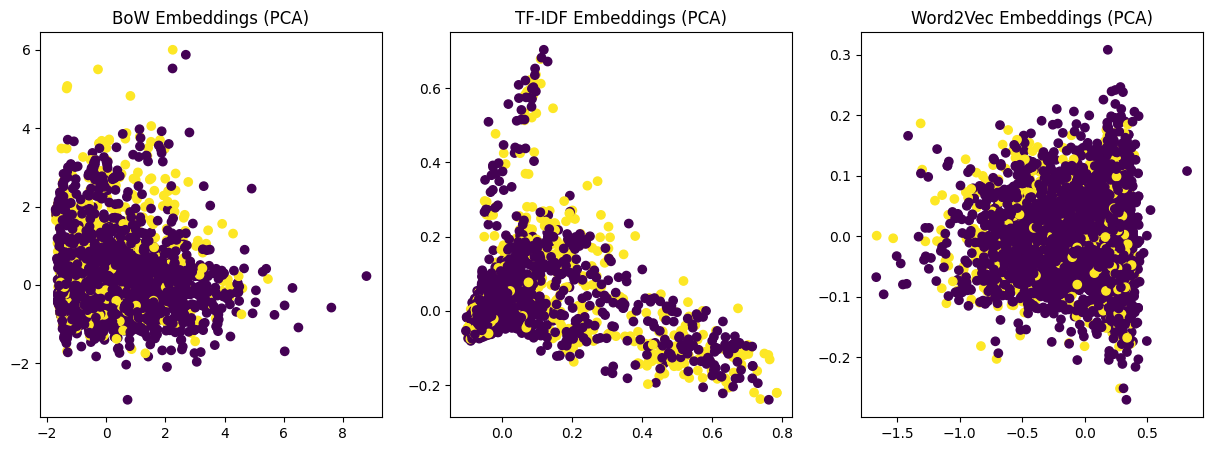

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import TfidfVectorizer
import numpy as np # Import numpy

pca = PCA(n_components=2)

# Create a Bag-of-Words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text']) # Assuming 'text' column holds the text data

# Create a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer() # Initialize TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['text']) # Assuming 'text' column holds the text data

X_bow_pca = pca.fit_transform(X_bow.toarray())
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

# Calculate average word2vec embeddings
X_word2vec_avg = []
for text in df['cleaned_text']: # Assuming 'tokens' column exists
    word_vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    if word_vectors:
        X_word2vec_avg.append(np.mean(word_vectors, axis=0))
    else:
        X_word2vec_avg.append(np.zeros(word2vec_model.vector_size))

# Ensure X_word2vec_avg is a numpy array before stacking
X_word2vec_avg = np.array(X_word2vec_avg)

X_word2vec_pca = pca.fit_transform(X_word2vec_avg)

# Plot the PCA-reduced data
plt.figure(figsize=(15, 5))

# BoW
plt.subplot(1, 3, 1)

plt.scatter(X_bow_pca[:, 0], X_bow_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0))
plt.title('BoW Embeddings (PCA)')

# TF-IDF
plt.subplot(1, 3, 2)

plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0))
plt.title('TF-IDF Embeddings (PCA)')

# Word2Vec
plt.subplot(1, 3, 3)

plt.scatter(X_word2vec_pca[:, 0], X_word2vec_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0))
plt.title('Word2Vec Embeddings (PCA)')

plt.show()

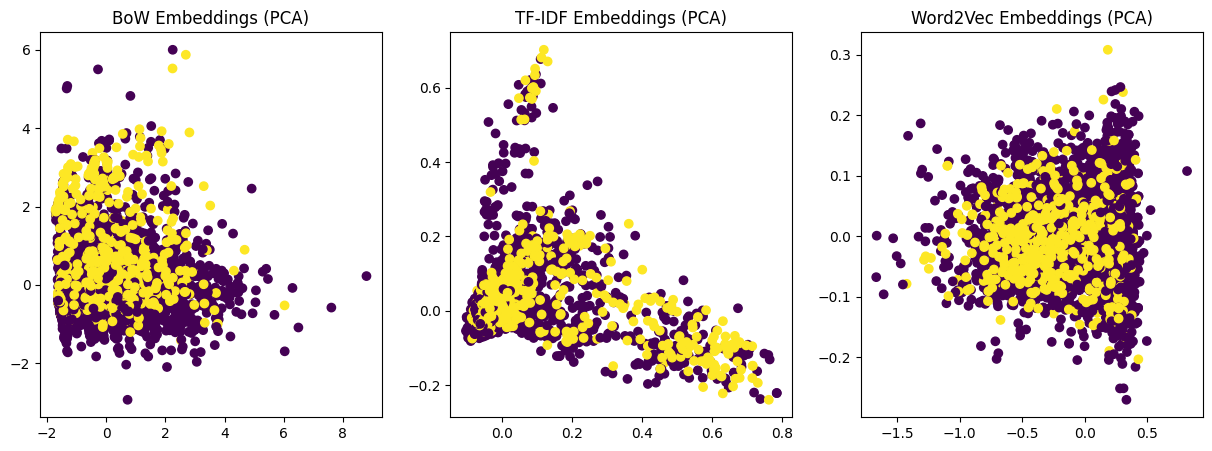

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
X_bow_pca = pca.fit_transform(X_bow.toarray())
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

# Ensure X_word2vec_avg is a numpy array before stacking
X_word2vec_avg = np.array(X_word2vec_avg)

X_word2vec_pca = pca.fit_transform(X_word2vec_avg)

# Plot the PCA-reduced data
plt.figure(figsize=(15, 5))

# BoW
plt.subplot(1, 3, 1)
plt.scatter(X_bow_pca[:, 0], X_bow_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'negative' else 0))
plt.title('BoW Embeddings (PCA)')

# TF-IDF
plt.subplot(1, 3, 2)
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'negative' else 0))
plt.title('TF-IDF Embeddings (PCA)')

# Word2Vec
plt.subplot(1, 3, 3)
plt.scatter(X_word2vec_pca[:, 0], X_word2vec_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'negative' else 0))
plt.title('Word2Vec Embeddings (PCA)')

plt.show()

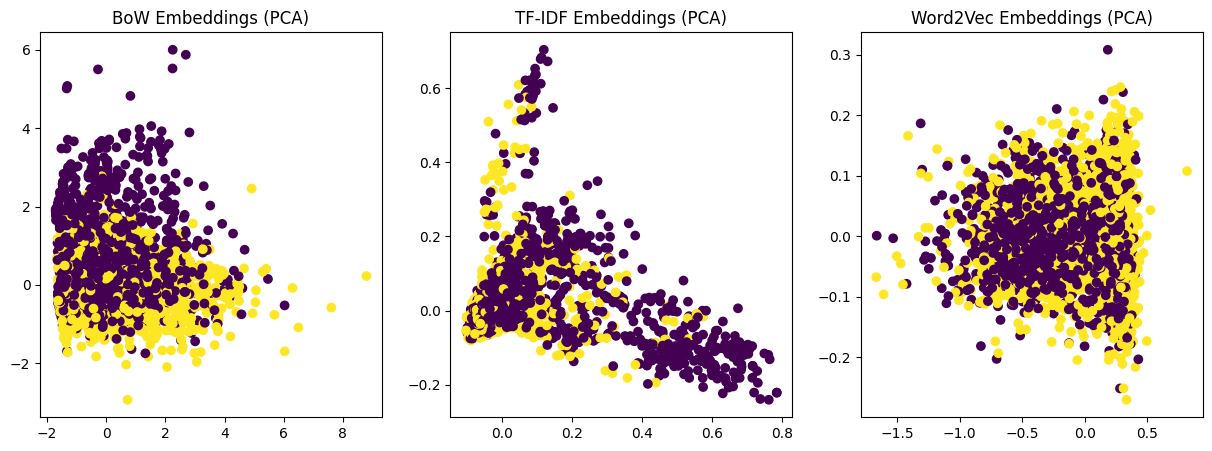

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
X_bow_pca = pca.fit_transform(X_bow.toarray())
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

# Ensure X_word2vec_avg is a numpy array before stacking
X_word2vec_avg = np.array(X_word2vec_avg)

X_word2vec_pca = pca.fit_transform(X_word2vec_avg)

# Plot the PCA-reduced data
plt.figure(figsize=(15, 5))

# BoW
plt.subplot(1, 3, 1)
plt.scatter(X_bow_pca[:, 0], X_bow_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'neutral' else 0))
plt.title('BoW Embeddings (PCA)')

# TF-IDF
plt.subplot(1, 3, 2)
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'neutral' else 0))
plt.title('TF-IDF Embeddings (PCA)')

# Word2Vec
plt.subplot(1, 3, 3)
plt.scatter(X_word2vec_pca[:, 0], X_word2vec_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'neutral' else 0))
plt.title('Word2Vec Embeddings (PCA)')

plt.show()

In [ ]:
# Filter the data for 'positive' and 'neutral' sentiments
df_pn = df[df['sentiment'].isin(['positive', 'neutral'])]

In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df_pn['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for each token list
def get_avg_word2vec(tokens, model, vector_size):
    # Filter out tokens not in the model
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return [0] * vector_size
    else:
        return sum(vectors) / len(vectors)

# Apply the function to convert each list of tokens into a single feature vector
df_pn['word2vec'] = df_pn['cleaned_text'].apply(lambda x: get_avg_word2vec(x, word2vec_model, 100))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert sentiment to numeric labels (e.g., positive -> 1, neutral -> 0)
df_pn['sentiment_label'] = df_pn['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Features and labels
X = list(df_pn['word2vec'])
y = df_pn['sentiment_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pickle

# Save using pickle
with open("word2vec_model.pkl", "wb") as f:
    pickle.dump(word2vec_model, f)

# **Applying Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure X and df_pn['sentiment'] come from the same DataFrame
X = list(df_pn['word2vec']) # Assuming 'word2vec' column exists in df_pn

# Now X and df_pn['sentiment'] should have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, df_pn['sentiment'], test_size=0.2, random_state=42)

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6883116883116883
              precision    recall  f1-score   support

     neutral       0.69      0.98      0.81       564
    positive       0.74      0.10      0.18       283

    accuracy                           0.69       847
   macro avg       0.71      0.54      0.49       847
weighted avg       0.71      0.69      0.60       847



In [ ]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6883116883116883


In [ ]:
# Accuracy on the training set
train_accuracy = log_reg.score(X_train, y_train)

# Accuracy on the test set
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.6977567886658795
Test Accuracy: 0.6883116883116883


# Predicting

In [ ]:
import numpy as np

# Function to preprocess and convert a sentence to Word2Vec representation
def preprocess_and_convert_to_word2vec(sentence, word2vec_model):
    # Step 1: Remove special characters and keep only alphanumeric and spaces
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Step 2: Convert to lowercase
    sentence = sentence.lower()

    # Step 3: Tokenize the sentence
    tokens = sentence.split()  # Simple tokenization by splitting on spaces

    # Step 4: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 6: Convert tokens to Word2Vec vectors
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]

    # Step 7: If no known words are found, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)

    # Step 8: Take the mean of the word vectors to represent the sentence
    word2vec_vector = np.mean(word_vectors, axis=0)

    return word2vec_vector

# Example input sentence
new_sentence = "The company's profits have skyrocketed this quarter, and employees are thrilled with the new opportunities for growth and innovation"

# Convert the new sentence to Word2Vec vector
new_sentence_vector = preprocess_and_convert_to_word2vec(new_sentence, word2vec_model)  # Assuming word2vec_model exists

# Reshape the vector to fit the model's expected input shape
new_sentence_vector = new_sentence_vector.reshape(1, -1)

# Predict sentiment using the trained logistic regression model
predicted_sentiment = log_reg.predict(new_sentence_vector)

# Print the predicted sentiment (1 for positive, 0 for neutral, -1 for negative)
print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: neutral


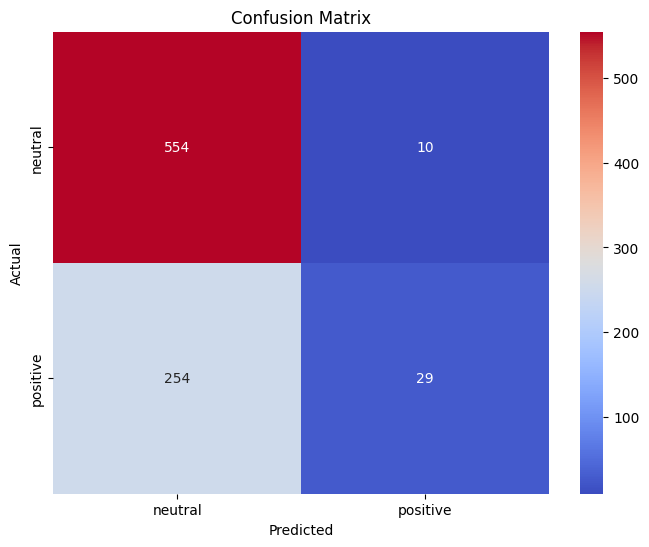

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculate precision, recall, F1-score, and confusion matrix
precision = precision_score(y_test, y_pred, average='macro') # Set average to 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro') # Set average to 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='macro') # Set average to 'macro' for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# You can also use classification_report for a comprehensive report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6883116883116883
Precision: 0.7146166539730896
Recall: 0.5423715008896575
F1 Score: 0.49385219926479906
Confusion Matrix:
[[554  10]
 [254  29]]

Classification Report:
               precision    recall  f1-score   support

     neutral       0.69      0.98      0.81       564
    positive       0.74      0.10      0.18       283

    accuracy                           0.69       847
   macro avg       0.71      0.54      0.49       847
weighted avg       0.71      0.69      0.60       847



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

# Print cross-validation scores and their average
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.69616519 0.69616519 0.68731563 0.71491876 0.68833087]
Mean cross-validation score: 0.6965791296845794


In [ ]:
'''
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import roc_curve, auc\n\n# Get the predicted probabilities for the positive class\ny_prob = log_reg.predict_proba(X_test)[:, 1]\n\n# Calculate the ROC curve and AUC score\nfpr, tpr, thresholds = roc_curve(y_test, y_prob)\nroc_auc = auc(fpr, tpr)\n\n# Plot the ROC curve\nplt.figure()\nplt.plot(fpr, tpr, color=\'green\', lw=2, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'grey\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic (ROC) Curve\')\nplt.legend(loc="lower right")\nplt.show()\n'

In [ ]:
'''
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
'''

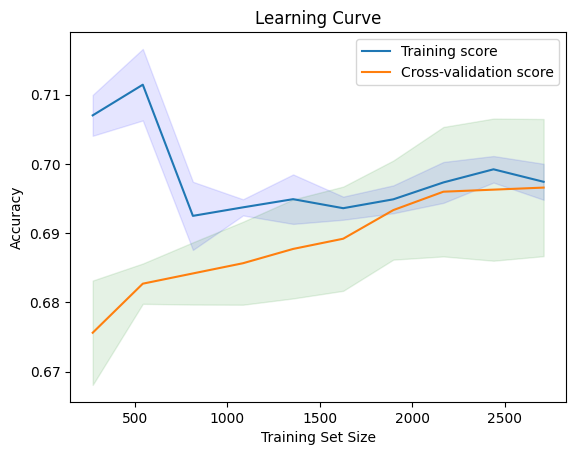

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier(criterion='gini', splitter='best',random_state=42)
dtree=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     neutral       0.71      0.68      0.70       564
    positive       0.42      0.45      0.43       283

    accuracy                           0.60       847
   macro avg       0.56      0.57      0.56       847
weighted avg       0.61      0.60      0.61       847



In [ ]:
print(accuracy_score(y_test,y_pred))

0.6044864226682408


In [ ]:
train_accuracy_dt = accuracy_score(y_train, dtree.predict(X_train))
test_accuracy_dt = accuracy_score(y_test, y_pred)

print(f"Decision Tree Training Accuracy: {train_accuracy_dt}")
print(f"Decision Tree Test Accuracy: {test_accuracy_dt}")

Decision Tree Training Accuracy: 0.9991145218417946
Decision Tree Test Accuracy: 0.6044864226682408


***RandomForest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf=rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

     neutral       0.70      0.96      0.81       564
    positive       0.68      0.19      0.29       283

    accuracy                           0.70       847
   macro avg       0.69      0.57      0.55       847
weighted avg       0.69      0.70      0.64       847



In [ ]:
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

Random Forest Training Accuracy: 0.9991145218417946
Random Forest Test Accuracy: 0.6989374262101535


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier=RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=5,min_samples_leaf=1,max_depth=None)
rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

     neutral       0.71      0.96      0.81       564
    positive       0.72      0.21      0.32       283

    accuracy                           0.71       847
   macro avg       0.71      0.58      0.57       847
weighted avg       0.71      0.71      0.65       847



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the model
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)
#random_search=RandomizedSearchCV({'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None})
#random_search=random_search.fit(X_train,y_train)
#random_search


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}


In [ ]:
y_pred = random_search.predict(X_test) # Use the fitted random_search object to predict
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     neutral       0.71      0.97      0.82       564
    positive       0.74      0.19      0.31       283

    accuracy                           0.71       847
   macro avg       0.72      0.58      0.56       847
weighted avg       0.72      0.71      0.65       847



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
rf_classifier2=RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=2,min_samples_leaf=2,max_depth=None)
rf_classifier2.fit(X_train,y_train)
y_pred=rf_classifier2.predict(X_test)
y_pred

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 

In [ ]:

# Save the trained model (e.g., Random Forest)
joblib.dump(rf, 'random_forest_model.pkl')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = XGBClassifier(random_state=1001)

# Store accuracy for each fold
accuracy_scores = []

# Initialize LabelEncoder
le = LabelEncoder()

# Convert X to a NumPy array if it's not already
if not isinstance(X, np.ndarray):
    X = np.array(X)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert string labels to numerical labels
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_scores)}')

In [ ]:
from sklearn.svm import SVC
# Initialize the model
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred_svm = svm_classifier.predict(X_train)
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM Training Accuracy: {train_accuracy_svm}")
print(f"SVM Test Accuracy: {test_accuracy_svm}")

In [ ]:
predicted_sentiment = svm_classifier.predict(new_sentence_vector)

# Print the predicted sentiment (1 for positive, 0 for neutral, -1 for negative)
print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred_knn = knn_classifier.predict(X_train)
y_test_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"KNN Training Accuracy: {train_accuracy_knn}")
print(f"KNN Test Accuracy: {test_accuracy_knn}")